# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [2]:
df = df.drop('diagnosis', axis=1)
df.head()

id  radius_mean  ...  fractal_dimension_worst  Unnamed: 32
0    842302        17.99  ...                  0.11890          NaN
1    842517        20.57  ...                  0.08902          NaN
2  84300903        19.69  ...                  0.08758          NaN
3  84348301        11.42  ...                  0.17300          NaN
4  84358402        20.29  ...                  0.07678          NaN

[5 rows x 32 columns]

## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [0]:
# Perform K-Means Clustering on the Dataset

In [9]:
# See the columns of the dataframe
df.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

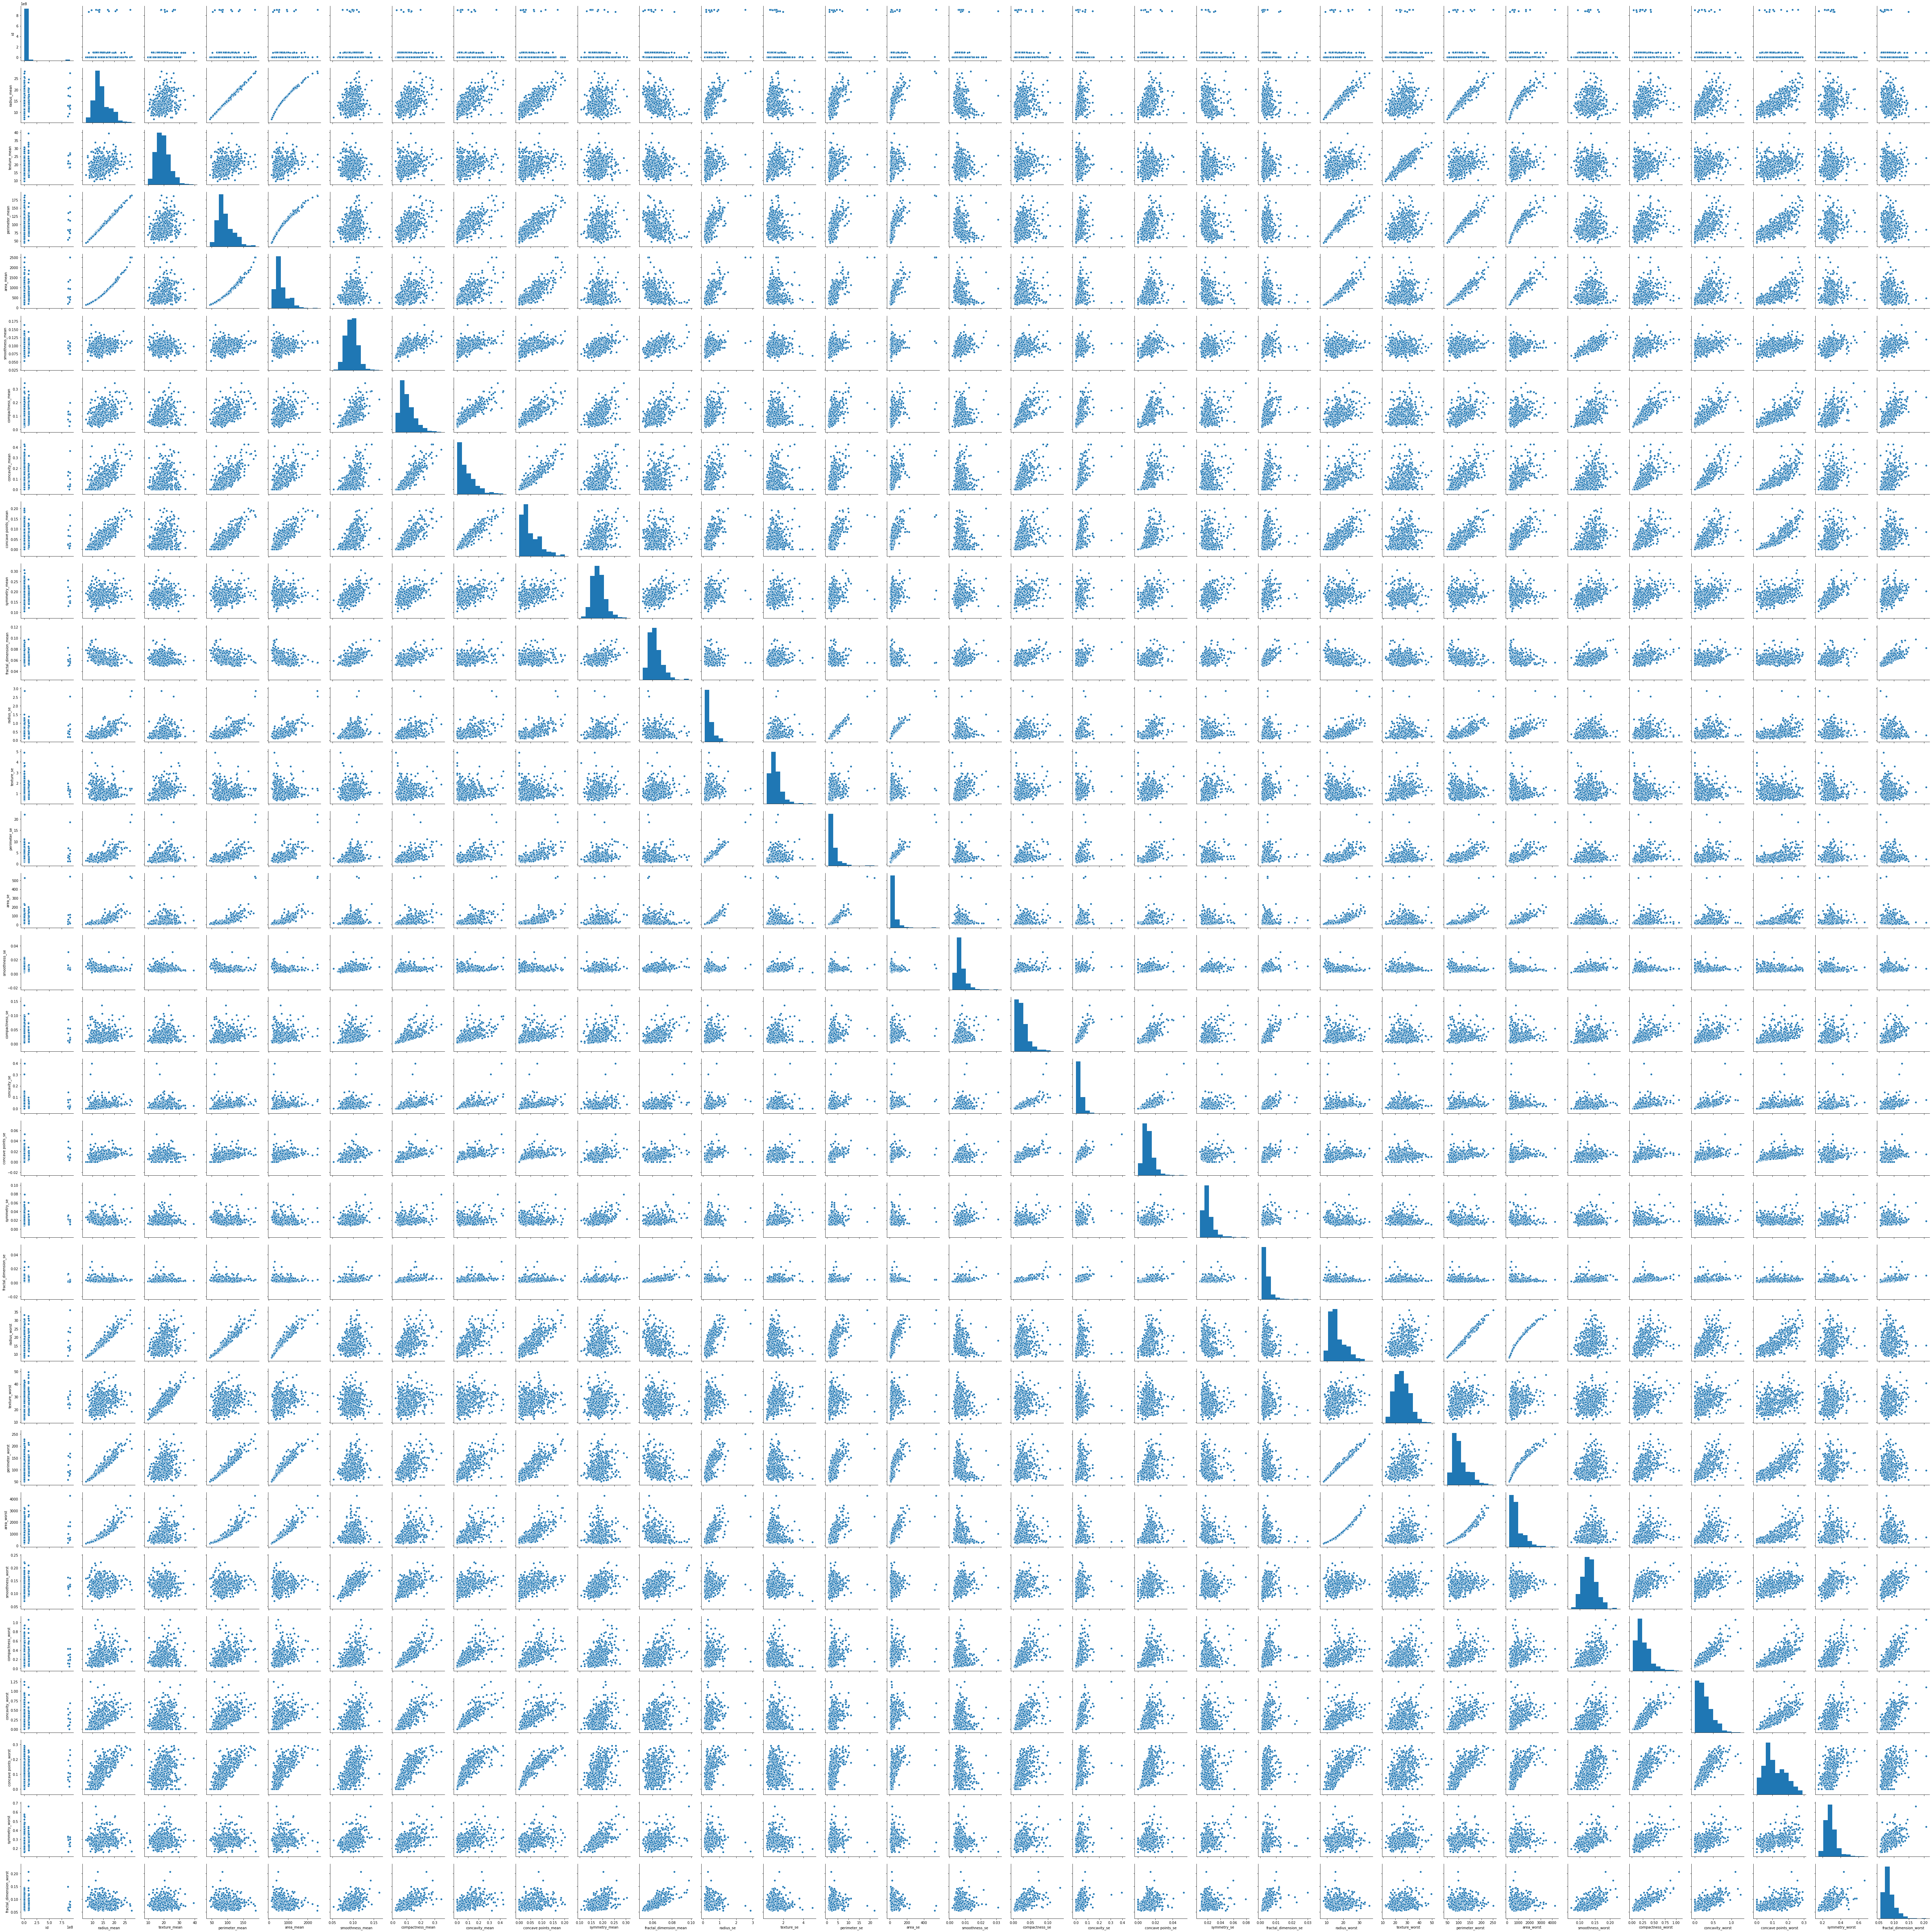

In [40]:
# The dataframe has a column names `Unnamed: 32` 
# In order to do some data exploration to see if I can find specific columns that will help distinct clusters of cells, I drop the column `Unnamed: 32`
df_1 = df.drop('Unnamed: 32', axis=1)
seaborn.pairplot(df_1)

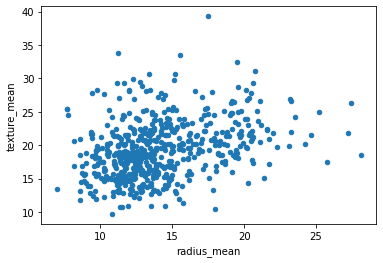

In [185]:
# I will try to use as features `smoothness_se` and `compactness_worst`
features = ['radius_mean','texture_mean']
df_1[features].plot(kind="scatter", x=features[0], y=features[1]);

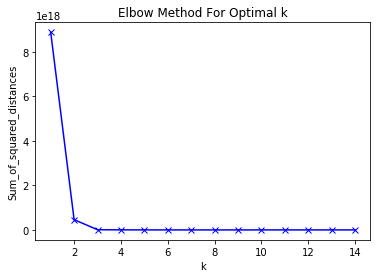

In [186]:
# Create an `Elbow` graph to decide on number of clusters
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_1)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
# According to the above graph, I will use k=2

In [0]:
# Initialize an instance of the KMeans class from sklearn.
k = 3
model = KMeans(n_clusters=k, max_iter=1)

In [188]:
# Fit the instantiated model to the sliced dataframe
model.fit(df_1[features].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# Assign clusters back to the dataframe
df_1['cluster'] = model.labels_

In [194]:
df_1.head()

id  radius_mean  ...  fractal_dimension_worst  cluster
0    842302        17.99  ...                  0.11890        1
1    842517        20.57  ...                  0.08902        0
2  84300903        19.69  ...                  0.08758        0
3  84348301        11.42  ...                  0.17300        2
4  84358402        20.29  ...                  0.07678        0

[5 rows x 32 columns]

In [0]:
# Get our centroids
centroids = model.cluster_centers_

In [191]:
# turn them into a dataframe
cc  =  pd.DataFrame(centroids)
cc.head()

0          1
0  19.152340  21.362695
1  12.108429  16.247855
2  13.227432  23.511079

In [0]:
# Setup some colors for plotting
base_colors = ['r', 'g', 'b']
colors = [base_colors[centroid] for centroid in model.labels_]

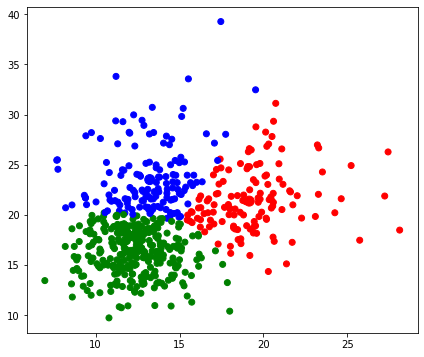

In [193]:
# Plot the scatter of our points with calculated centroids
fig, ax =  plt.subplots(figsize=(7,6))
ax.scatter(df_1[features[0]], df_1[features[1]], c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=100);

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
# Your Code Here

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [140]:
# read back in the data
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
df.head()

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

In [0]:
# drop `Unnamed: 32` column, which contains NaNs
df = df.drop('Unnamed: 32', axis=1)

In [142]:
# keep all variables as features
features=list(df.columns)
features

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [0]:
# instantiate the SKLearn class for standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [144]:
# Get unique values for diagnosis
np.unique(df['diagnosis'])

array(['B', 'M'], dtype=object)

In [145]:
# Convert `diagnosis` column into numeric
# 'B'=0, 'M'=1
df.diagnosis = df.diagnosis.map( {'B':0 , 'M':1} )
np.unique(df['diagnosis'])

array([0, 1])

In [0]:
# Standardize the dataset 
scaled_data = scaler.fit_transform(df)

In [147]:
# Turn it back into a dataframe.
df_scaled = pd.DataFrame(scaled_data,columns=features)
df_scaled.head()

id  diagnosis  ...  symmetry_worst  fractal_dimension_worst
0 -0.236405   1.297676  ...        2.750622                 1.937015
1 -0.236403   1.297676  ...       -0.243890                 0.281190
2  0.431741   1.297676  ...        1.152255                 0.201391
3  0.432121   1.297676  ...        6.046041                 4.935010
4  0.432201   1.297676  ...       -0.868353                -0.397100

[5 rows x 32 columns]

In [148]:
# Check the means
df_scaled.mean()

id                         8.877882e-18
diagnosis                  1.108857e-15
radius_mean               -1.256562e-16
texture_mean               1.049736e-16
perimeter_mean            -1.272171e-16
area_mean                 -1.900452e-16
smoothness_mean            1.490704e-16
compactness_mean           2.544342e-16
concavity_mean            -1.338511e-16
concave points_mean       -8.429110e-17
symmetry_mean              2.081912e-16
fractal_dimension_mean     5.408679e-16
radius_se                  2.475807e-16
texture_se                -9.912009e-17
perimeter_se              -2.968237e-16
area_se                   -1.088760e-16
smoothness_se              4.426014e-16
compactness_se             1.958988e-16
concavity_se               1.678017e-16
concave points_se          2.185325e-17
symmetry_se                1.523874e-16
fractal_dimension_se      -5.658430e-17
radius_worst              -7.988142e-16
texture_worst             -1.834112e-17
perimeter_worst           -4.015534e-16


In [149]:
# Check the standard devations
df_scaled[features].std()

id                         1.00088
diagnosis                  1.00088
radius_mean                1.00088
texture_mean               1.00088
perimeter_mean             1.00088
area_mean                  1.00088
smoothness_mean            1.00088
compactness_mean           1.00088
concavity_mean             1.00088
concave points_mean        1.00088
symmetry_mean              1.00088
fractal_dimension_mean     1.00088
radius_se                  1.00088
texture_se                 1.00088
perimeter_se               1.00088
area_se                    1.00088
smoothness_se              1.00088
compactness_se             1.00088
concavity_se               1.00088
concave points_se          1.00088
symmetry_se                1.00088
fractal_dimension_se       1.00088
radius_worst               1.00088
texture_worst              1.00088
perimeter_worst            1.00088
area_worst                 1.00088
smoothness_worst           1.00088
compactness_worst          1.00088
concavity_worst     

In [0]:
# Apply PCA
# import and instantiate the PCA class
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [0]:
# Rearange `diagnosis` column in order to be the first one
cols = ['diagnosis']  + [col for col in df if col != 'diagnosis']
df = df[cols]

In [152]:
# Apply PCA to the data
pca_features = pca.fit_transform(df_scaled)
pca_features[:11]

array([[ 9.21672415,  2.13674958],
       [ 2.65124379, -3.77074095],
       [ 5.90069721, -1.01091627],
       [ 7.13737623, 10.31563611],
       [ 4.13926312, -1.91689091],
       [ 2.56431549,  3.89987169],
       [ 2.50248117, -2.71230059],
       [ 2.36110686,  2.273478  ],
       [ 3.35301631,  3.36114779],
       [ 6.42283977,  7.74370969],
       [-0.47466529, -2.77418029]])

In [153]:
#  how much variation did each principal component explain?
pca.explained_variance_ratio_

array([0.43512603, 0.17910333])

In [154]:
# How much total variance did we explain?
sum(pca.explained_variance_ratio_)

0.6142293615339287

In [155]:
# How much information did we lose?
1-sum(pca.explained_variance_ratio_)

0.3857706384660713

In [156]:
# Turn that into a dataframe.
df_pca=pd.DataFrame(pca_features, columns=['comp_1', 'comp_2'])
df_pca.head()

comp_1     comp_2
0  9.216724   2.136750
1  2.651244  -3.770741
2  5.900697  -1.010916
3  7.137376  10.315636
4  4.139263  -1.916891

In [0]:
# Apply clustering
# Initialize an instance of the KMeans class from sklearn.
k = 3
model = KMeans(n_clusters=k, max_iter=1)

In [158]:
# Fit the instantiated model to our sliced dataframe
model.fit(df_pca.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# Assign predicted clusters back to our dataframe
df_pca['cluster'] = model.labels_

In [0]:
# Get our centroids
centroids = model.cluster_centers_

In [161]:
# turn them into a dataframe
cc = pd.DataFrame(centroids)
cc.head()

0         1
0 -2.307568 -0.156946
1  4.905279 -1.198379
2  2.364822  4.636697

In [0]:
# Setup some colors for plotting
base_colors = ['r', 'g', 'b']
colors = [base_colors[centroid] for centroid in model.labels_]

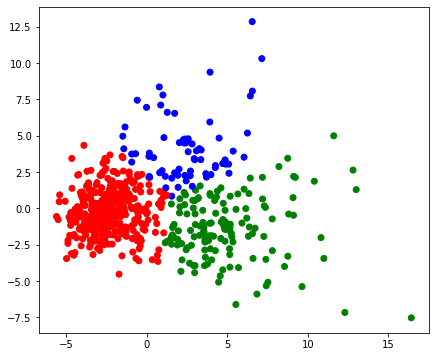

In [163]:
# Plot the scatter of our points with calculated centroids
fig, ax = plt.subplots(figsize=(7,6))
ax.scatter(df_pca['comp_1'], df_pca['comp_2'], c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=100);

In [0]:
# Use a scree plot to decide how many principal components to include in the clustering
# Apply PCA for 11 features
pca = PCA(n_components=11)
# Apply PCA to the data
pca_features = pca.fit_transform(df_scaled)

# define the number of components
num_components=len(pca.explained_variance_ratio_)
# create a numpy array as long as the number of components
ind = np.arange(num_components) 
# create an array of 10 values
vals = pca.explained_variance_ratio_

In [175]:
pca.explained_variance_ratio_

array([0.43512603, 0.17910333, 0.08952887, 0.06247288, 0.05184795,
       0.03858446, 0.03059084, 0.02128672, 0.01467893, 0.01262931,
       0.01091149])

In [0]:
# Define scree plot function
def scree_plot(pca):

    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals, c='r')
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)

    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

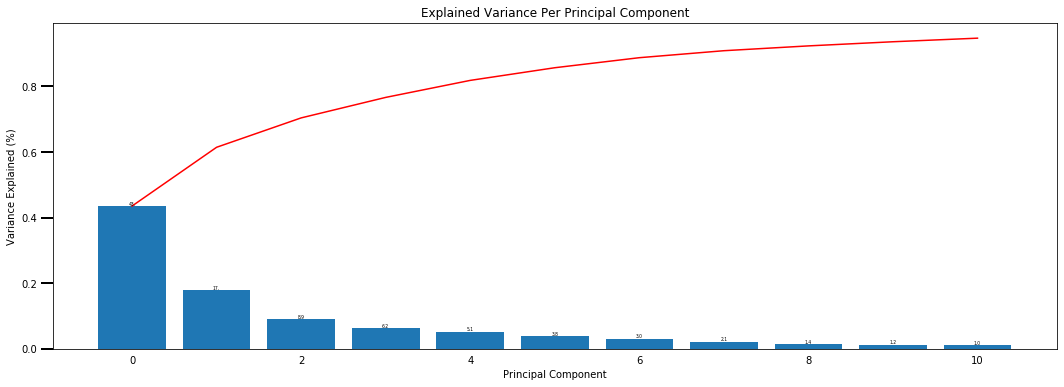

In [177]:
# Apply the plot function to our principle component
scree_plot(pca)

In [178]:
# According to the scree plot we need to use 8 principal components in order to retain 90% of the variation of the original dataset
# Apply PCA for 8 components
pca = PCA(n_components=8)
# Apply PCA to the data
pca_features = pca.fit_transform(df_scaled)

#  how much variation did each principal component explain?
pca.explained_variance_ratio_

array([0.43512603, 0.17910333, 0.08952887, 0.06247288, 0.05184795,
       0.03858446, 0.03059084, 0.02128672])

In [179]:
# How much total variance did we explain?
sum(pca.explained_variance_ratio_)

0.9085410725834855

In [180]:
# Turn that into a dataframe.
df_pca=pd.DataFrame(pca_features, columns=['comp_1', 'comp_2', 'comp_3', 'comp_4', 'comp_5', 'comp_6', 'comp_7', 'comp_8'])
df_pca.head()

comp_1     comp_2    comp_3  ...    comp_6    comp_7    comp_8
0  9.216724   2.136750 -0.996666  ... -1.375761  0.395577  2.211310
1  2.651244  -3.770741 -0.554319  ... -0.122295 -0.308984 -0.067298
2  5.900697  -1.010916 -0.467841  ... -0.402070  0.460244 -0.708070
3  7.137376  10.315636 -3.256828  ... -2.567002  1.962898  1.231386
4  4.139263  -1.916891  1.465280  ...  1.240988 -0.242107 -1.093703

[5 rows x 8 columns]

In [0]:
# Initialize an instance of the KMeans class from sklearn.
k = 3
model = KMeans(n_clusters=k, max_iter=1)

# Fit the instantiated model to our sliced dataframe
model.fit(df_pca.values)

# Assign predicted clusters back to our dataframe
df_pca['cluster'] = model.labels_

# Get our centroids
centroids    =  model.cluster_centers_

# turn them into a dataframe
cc  =  pd.DataFrame(centroids)

# Setup some colors for plotting
base_colors  =  ['r', 'g', 'b']
colors       =  [base_colors[centroid] for centroid in model.labels_]

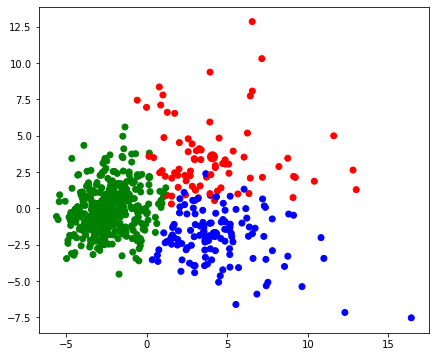

In [183]:
# Plot the scatter of our points with calculated centroids
fig, ax      =  plt.subplots(figsize=(7,6))
ax.scatter(df_pca['comp_1'], df_pca['comp_2'], c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=100);

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project